Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


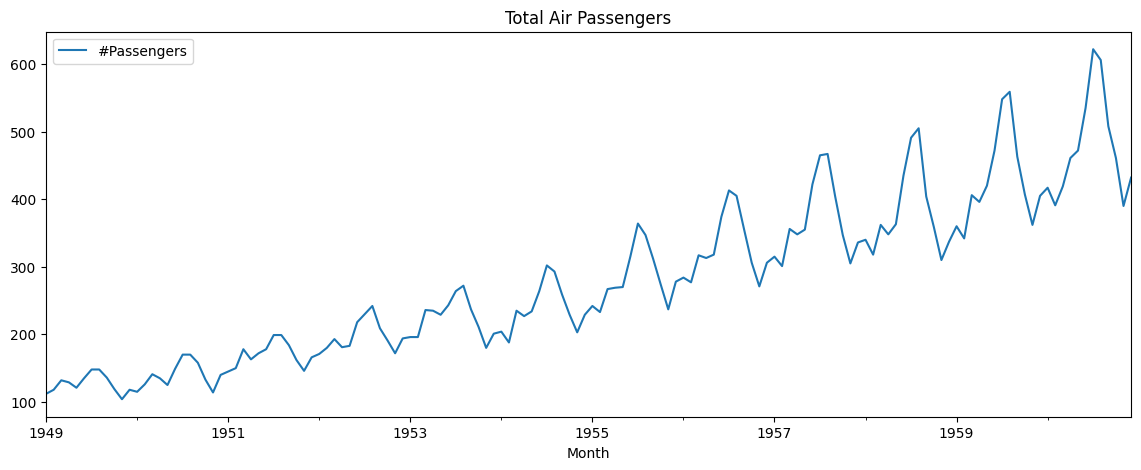

In [16]:
# load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv(
    '/content/drive/MyDrive/Jupyter/JupyterIT8302new/data/airpassengers.csv')

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Visual Check
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
df.plot(ax=ax)
ax.set_title('Total Air Passengers')
plt.show()

* **Simple Exponential Smoothing**: This method only smooths the level of the time series. It is suitable for time series data that has no trend or seasonality.

* **Holt's Double Exponential Smoothing**: This method smooths both the level and the trend of the time series. It is suitable for time series data that has a trend but no seasonality. It uses two smoothing parameters: one for the level and one for the trend.

* **Holt-Winters Triple Exponential Smoothing**: This method smooths the level, the trend, and the seasonality of the time series. It is suitable for time series data that has both a trend and seasonality. It uses three smoothing parameters: one for the level, one for the trend, and one for the seasonality.

In summary:

* Simple Exponential Smoothing: Level smoothing
* Holt's Double Exponential Smoothing: Level and Trend smoothing
* Holt-Winters Triple Exponential Smoothing: Level, Trend, and Seasonality smoothing

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecast for the next 12 months:
1961-01-01    431.999999
1961-02-01    431.999999
1961-03-01    431.999999
1961-04-01    431.999999
1961-05-01    431.999999
1961-06-01    431.999999
1961-07-01    431.999999
1961-08-01    431.999999
1961-09-01    431.999999
1961-10-01    431.999999
1961-11-01    431.999999
1961-12-01    431.999999
Freq: MS, dtype: float64


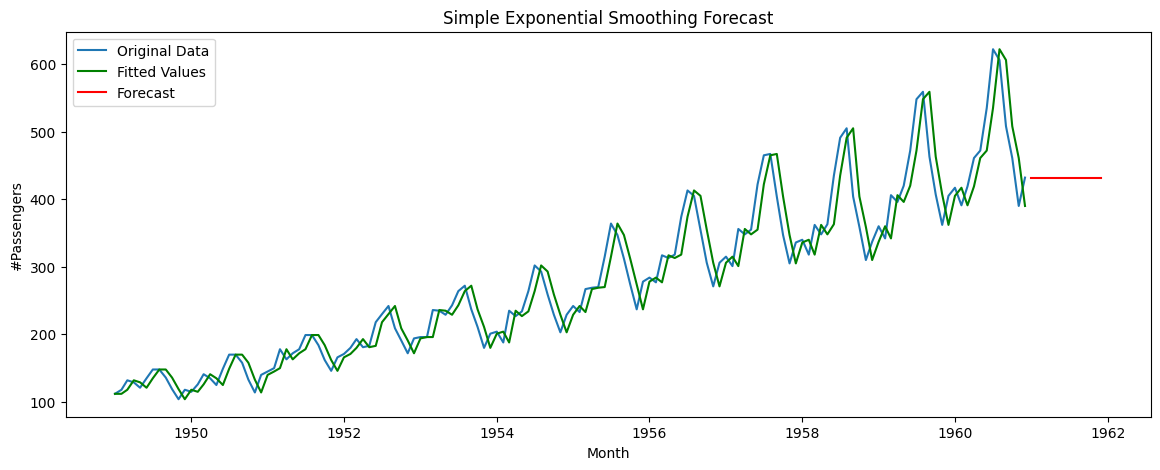

In [17]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit Simple Exponential Smoothing model
model = SimpleExpSmoothing(df['#Passengers'])
fit = model.fit()

# Make forecast
forecast = fit.forecast(12) # Forecast for the next 12 months

# Display the forecast
print("Forecast for the next 12 months:")
print(forecast)

# Plot the original data, fitted values, and the forecast
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['#Passengers'], label='Original Data')
plt.plot(df.index, fit.fittedvalues, label='Fitted Values', color='green') # Add fitted values
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecast for the next 12 months using Holt's Method:
1961-01-01    436.564624
1961-02-01    441.129249
1961-03-01    445.693873
1961-04-01    450.258498
1961-05-01    454.823122
1961-06-01    459.387747
1961-07-01    463.952372
1961-08-01    468.516996
1961-09-01    473.081621
1961-10-01    477.646245
1961-11-01    482.210870
1961-12-01    486.775495
Freq: MS, dtype: float64


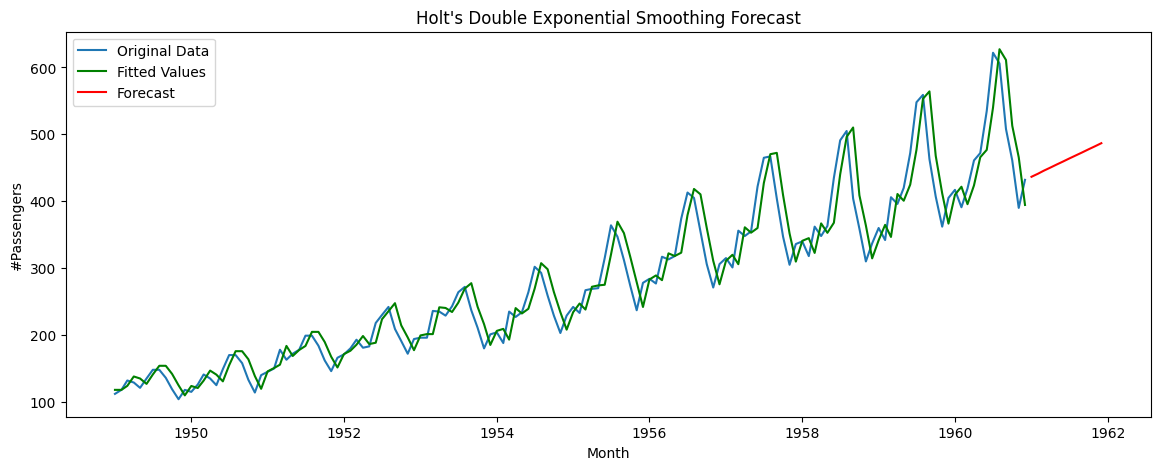

In [18]:
from statsmodels.tsa.holtwinters import Holt

# Instantiate Holt's Double Exponential Smoothing model
holt_model = Holt(df['#Passengers'])

# Fit the model
holt_fit = holt_model.fit()

# Make forecast using Holt's model
holt_forecast = holt_fit.forecast(12) # Forecast for the next 12 months

# Display the forecast
print("Forecast for the next 12 months using Holt's Method:")
print(holt_forecast)

# Plot the original data, fitted values, and the forecast from Holt's model
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['#Passengers'], label='Original Data')
plt.plot(df.index, holt_fit.fittedvalues, label='Fitted Values', color='green')
plt.plot(holt_forecast.index, holt_forecast, label='Forecast', color='red')
plt.title('Holt\'s Double Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecast for the next 12 months using Holt-Winters Method:
1961-01-01    451.576310
1961-02-01    427.256384
1961-03-01    464.696765
1961-04-01    500.101255
1961-05-01    508.658613
1961-06-01    567.711517
1961-07-01    647.894966
1961-08-01    632.458259
1961-09-01    534.371342
1961-10-01    484.927927
1961-11-01    418.455746
1961-12-01    471.054591
Freq: MS, dtype: float64


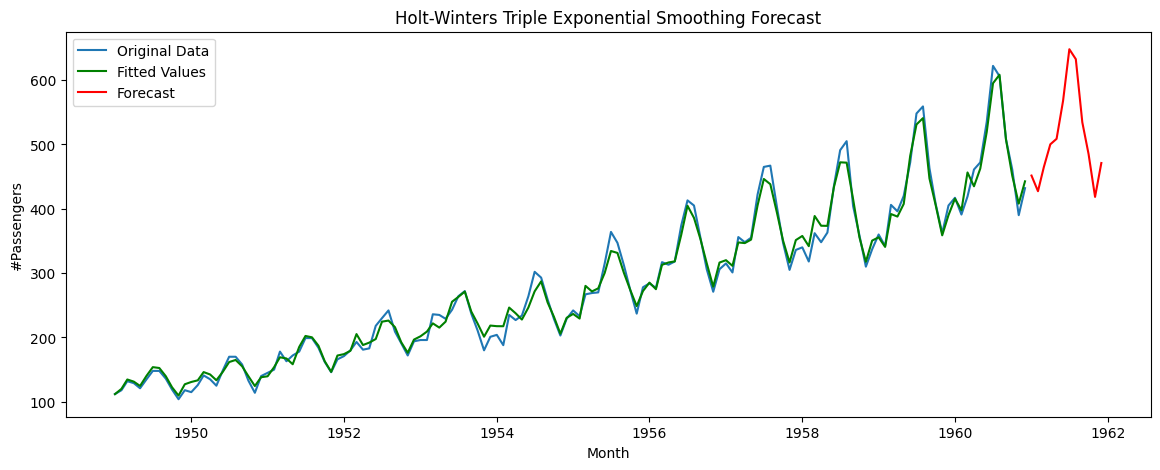

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Instantiate Holt-Winters Triple Exponential Smoothing model (with additive or multiplicative seasonality)
# We'll use additive seasonality for this example, but you might need to choose based on your data
holt_winters_model = ExponentialSmoothing(df['#Passengers'], seasonal_periods=12, trend='add', seasonal='add')

# Fit the model
holt_winters_fit = holt_winters_model.fit()

# Make forecast using Holt-Winters model
holt_winters_forecast = holt_winters_fit.forecast(12) # Forecast for the next 12 months

# Display the forecast
print("Forecast for the next 12 months using Holt-Winters Method:")
print(holt_winters_forecast)

# Plot the original data, fitted values, and the forecast from Holt-Winters model
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['#Passengers'], label='Original Data')
plt.plot(df.index, holt_winters_fit.fittedvalues, label='Fitted Values', color='green')
plt.plot(holt_winters_forecast.index, holt_winters_forecast, label='Forecast', color='red')
plt.title('Holt-Winters Triple Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('#Passengers')
plt.legend()
plt.show()